## Data Preparation and Class Selection

In [ ]:
                            #first we included all of our libraries import os
import pandas as pd
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
            #then we have a function prep_data in which we have 5 parameters
            #the train csv, the train folder, the output folder, the class ids and the no. of images per class
def prep_data(train_csv, train_folder, output_folder, c_i, img_eachclass=100):
        #then first we read the csv file 
    df = pd.read_csv(train_csv)
        #and we made sure that our output folder exists
    os.makedirs(output_folder, exist_ok=True)

        #then we looped through each class
    for i in c_i:
        
            #creating a seperate folder for each class in the main folder
        class_dir = os.path.join(output_folder, str(i))
        os.makedirs(class_dir, exist_ok=True)
            #then we picked the first image in each class folder
        subset = df[df['ClassId'] == i].head(img_eachclass)

            #another loop to process each image in the class folder
        for _, row in subset.iterrows():
                #defining the path to the orignal image
            src = os.path.join(train_folder, os.path.relpath(row['Path'], "Train"))
            dst = os.path.join(class_dir, os.path.basename(row['Path']))
            
            #loading the image
            image = cv2.imread(src)

            if image is not None:
                    #converting the image from bgr to hsv
                hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                cv2.imwrite(dst, hsv_image)
            else:
                print(f"Error loading image: {src}")


In [2]:
        #here we are calling our prep_data function with the parameters
prep_data(
            #we defined the path to our train_csv, train_folder and the output_folder
    train_csv=r"C:\Users\moon\Videos\dip\archive (1)\Train.csv",
    train_folder=r"C:\Users\moon\Videos\dip\archive (1)\Train",
    output_folder='working_data',
            #we defined the classes
    c_i=[0, 1, 2, 3, 5, 7, 9],
            #and the number of images in each class
    img_eachclass=100
)


In [ ]:
        #then we have a function which will be extracting our hsv features
def extract_hsv_features(image_path):
        #first we opened the image from the path
    image = Image.open(image_path)
        #and we then converted the image to the hsv 
    hsv_image = image.convert('HSV')
        #and then we converted it to a numpy array
    hsv_array = np.array(hsv_image)
    
    
        #after this we seperated the channels
    
    
                #the hue channel
    h = hsv_array[:, :, 0]  
                #the saturation channel
    s = hsv_array[:, :, 1]  
                #the value channel
    v = hsv_array[:, :, 2]  
    
    
        #and then we calculated the mean 
    
    
            #mean for the hue channel
    m_h = np.mean(h)
    
            #mean for saturation channnel
        
    m_s = np.mean(s)
    
            #mean for value channel 
    m_v = np.mean(v)
    
    
    return m_h, m_s, m_v


In [ ]:
                #then we classified each image by color

        #we have a function with 3 parameters hue, saturation and value
def classify_by_color(h, s, v):
    
        #then we classified by defining values 
        #that when saturation is less than 50 and value is greater than 200 
    if s < 50 and v > 200:
            #then return that it is a white sign
        return 'white_sign'
    
        #else if the hue is between 0 and 10 OR hue is between 160 and 180 then 
    elif 0 <= h <= 10 or 160 <= h <= 180:
            #then it should return that it is red sign
        return 'red_sign'
        #else if hue is between 20 and 30 
    elif 20 <= h <= 30:
            #then it should return that it is yellow sign
        return 'yellow_sign'
    elif 100 <= h <= 130:
        return 'blue_sign'
    
        #else it should return that it si unknown
    else:
        return 'unknown'
    


In [2]:

def classify_dataset(folder_path):
    
            #then we created a list to store th result
    results = []
    
            #we then looped through each class folder
    for class_id in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_id)
       
    
            #then once we are inside each class folder, then we looped through each image
        for filename in os.listdir(class_folder):
            image_path = os.path.join(class_folder, filename)
            try:
                
                        #we extracted the hue , value and saturation by calling the extract_hsv_features
                h, s, v = extract_hsv_features(image_path)
                
                    #we saved the result
                prediction = classify_by_color(h, s, v)
                results.append((class_id, filename, prediction))
                    #and printed the result
                print(f"Class: {class_id}, Image: {filename}, Prediction: {prediction}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")
                
        #returned the result
    return results


In [4]:
classify_dataset("working_data")


Class: 0, Image: 00000_00000_00000.png, Prediction: red_sign
Class: 0, Image: 00000_00000_00001.png, Prediction: unknown
Class: 0, Image: 00000_00000_00002.png, Prediction: unknown
Class: 0, Image: 00000_00000_00003.png, Prediction: unknown
Class: 0, Image: 00000_00000_00004.png, Prediction: unknown
Class: 0, Image: 00000_00000_00005.png, Prediction: unknown
Class: 0, Image: 00000_00000_00006.png, Prediction: unknown
Class: 0, Image: 00000_00000_00007.png, Prediction: unknown
Class: 0, Image: 00000_00000_00008.png, Prediction: blue_sign
Class: 0, Image: 00000_00000_00009.png, Prediction: blue_sign
Class: 0, Image: 00000_00000_00010.png, Prediction: blue_sign
Class: 0, Image: 00000_00000_00011.png, Prediction: blue_sign
Class: 0, Image: 00000_00000_00012.png, Prediction: blue_sign
Class: 0, Image: 00000_00000_00013.png, Prediction: blue_sign
Class: 0, Image: 00000_00000_00014.png, Prediction: blue_sign
Class: 0, Image: 00000_00000_00015.png, Prediction: blue_sign
Class: 0, Image: 00000_

[('0', '00000_00000_00000.png', 'red_sign'),
 ('0', '00000_00000_00001.png', 'unknown'),
 ('0', '00000_00000_00002.png', 'unknown'),
 ('0', '00000_00000_00003.png', 'unknown'),
 ('0', '00000_00000_00004.png', 'unknown'),
 ('0', '00000_00000_00005.png', 'unknown'),
 ('0', '00000_00000_00006.png', 'unknown'),
 ('0', '00000_00000_00007.png', 'unknown'),
 ('0', '00000_00000_00008.png', 'blue_sign'),
 ('0', '00000_00000_00009.png', 'blue_sign'),
 ('0', '00000_00000_00010.png', 'blue_sign'),
 ('0', '00000_00000_00011.png', 'blue_sign'),
 ('0', '00000_00000_00012.png', 'blue_sign'),
 ('0', '00000_00000_00013.png', 'blue_sign'),
 ('0', '00000_00000_00014.png', 'blue_sign'),
 ('0', '00000_00000_00015.png', 'blue_sign'),
 ('0', '00000_00000_00016.png', 'blue_sign'),
 ('0', '00000_00000_00017.png', 'blue_sign'),
 ('0', '00000_00000_00018.png', 'blue_sign'),
 ('0', '00000_00000_00019.png', 'blue_sign'),
 ('0', '00000_00000_00020.png', 'blue_sign'),
 ('0', '00000_00000_00021.png', 'blue_sign'),
 ('

In [ ]:
        #then we have a function for padding 
    #in which we passed 2 parameters: the image and the value of padding. we chose 1 meaning that it will pad one time on both row and column
def pad_image(img, pad=1):
    
                #padding for the rows and the columns
        padding = ((pad, pad), (pad, pad))
        
                #applying the padding 
        padded_img = np.pad(img, padding, mode='edge')

    #returning the padded img
    return padded_img

In [ ]:
        #then we have the function in which we applied the mean filter
def mean_filter(img):
    
        #first we called the pad_img function to pad the image
    img = pad_image(img)
    
        #then we created another matrix with the same dimension as the input image
    output = np.zeros_like(img)
    
    
        #then we looped over the rows of pixels of the images, -1 to exclude the borders
    for i in range(1, img.shape[0]-1):
            #then we looped over the columns of the pixels of the image 
        for j in range(1, img.shape[1]-1):
                    #extracting the 3 into 3 matrix
            region = img[i-1:i+2, j-1:j+2]
                    #calculating the mean of the region
            output[i, j] = np.mean(region)
            
        #and then we removed the padding
    return output[1:-1, 1:-1]

In [5]:
def gaussian_filter(img):
            #first we defined the gaussian kernel
    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]]) / 16
    
        #and then we padded the image
    img = pad_image(img)
    
        #once again we created an empty output image the same shape as teh padded image
    output = np.zeros_like(img)
    
        #then we looped through the pixels in the rows and the columns
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            
                    #we extrcated the 3 cross 3 matrix 
            region = img[i-1:i+2, j-1:j+2]
            
                    ##then we performed element wise multiplication and applied gaussian kernel
            output[i, j] = np.sum(region * kernel)
    return output[1:-1, 1:-1]



In [ ]:
def median_filter(img):
        #then we padded the image
    img = pad_image(img)
        #and created a matrix the same shape as the padded image
    output = np.zeros_like(img)
    
            #we looped through the pixels in the rows and the columns
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            
                #extrcating the region
            region = img[i-1:i+2, j-1:j+2]
            
                #and we applied the median filter
            output[i, j] = np.median(region)
    return output[1:-1, 1:-1]

In [ ]:
import numpy as np

def adaptive_median_filter(img, max_window=5):
    #we then created an empty list to store the result 
    padded = np.pad(img, pad_width=2, mode='edge')
    h, w = len(img), len(img[0])
    
    #creting a copy of the image
    output = []
    for i in range(h):
        output_row = []
        for j in range(w):
            #intializing by the value sof the pixels
            output_row.append(img[i][j]) 
        output.append(output_row)

    #processing each pixel
    for i in range(h):
        for j in range(w):
            #defined window sixe 3
            window_size = 3  
            while window_size <= max_window:
                half = window_size // 2
                #extracting the current refion
                region = padded[i:i + window_size, j:j + window_size].flatten()

                # Manually sort the region using bubble sort to find min, median, max
                z_min = np.min(region)  # Smallest value in the region
                z_med = np.median(region)  # Median value
                z_max = np.max(region)  # Largest value in the region

                # Adaptive median filter Stage A:
                A1 = z_med - z_min
                A2 = z_med - z_max

                if A1 > 0 and A2 < 0:
                    # Stage B: Check if the current pixel is noise
                    B1 = img[i][j] - z_min
                    B2 = img[i][j] - z_max
                    if B1 > 0 and B2 < 0:
                        # If current pixel is between min and max, keep it
                        output[i][j] = img[i][j]
                    else:
                        # Otherwise, replace it with the median
                        output[i][j] = z_med
                    break  # Stop increasing window size once a good result is found
                else:
                    # If Stage A fails, increase window size and try again
                    window_size += 2

            # If we reach the maximum window size and still no success, use median
            if window_size > max_window:
                output[i][j] = z_med

    return output


In [6]:
def unsharp_masking(img):
            #then we aplied gaussian filter to blur the image
    blurred = gaussian_filter(img)
    
        #we created  mask by subtrcating blurred image by og image
    mask = img - blurred
    
        #and then we sharpened the image
    sharpened = img + mask
    return np.clip(sharpened, 0, 255)


In [ ]:
def rgb_to_hsv_pil(image_path):          #function for rgb to hsv
    image = Image.open(image_path).convert('RGB')     #load
    hsv_image = image.convert('HSV')
    return np.array(hsv_image)

In [7]:
def segment_sign(hsv_img, color='red'):     #function to segment sign
    h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
    
    # Thresholds
    s_thresh = 100    #define thresholds
    v_thresh = 80

    if color == 'red':
        mask1 = (h >= 0) & (h <= 15)
        mask2 = (h >= 165) & (h <= 180)
        hue_mask = mask1 | mask2
    elif color == 'blue':
        hue_mask = (h >= 100) & (h <= 130)
    else:
        raise ValueError("Unsupported color class.")     #if class undefined

    mask = hue_mask & (s >= s_thresh) & (v >= v_thresh)
    return mask.astype(np.uint8) * 255     #return segmented


In [8]:
from scipy import ndimage
import cv2

def post_process_mask(mask, area_thresh=500):        
    # Morphological opening
    kernel = np.ones((3, 3), np.uint8)
    opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Fill holes
    filled = ndimage.binary_fill_holes(opened).astype(np.uint8) * 255

    # Remove small components
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(filled)
    output = np.zeros_like(mask)
    for i in range(1, num_labels):  # skip background
        if stats[i, cv2.CC_STAT_AREA] >= area_thresh:
            output[labels == i] = 255

    return output


In [9]:
import os
import matplotlib.pyplot as plt

def process_and_display(folder_path, color='red'):       #function to process and display
    for class_id in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_id)
        if not os.path.isdir(class_folder):
            continue
        for filename in os.listdir(class_folder):       #search for file in folder
            image_path = os.path.join(class_folder, filename)
            try:
                hsv_img = rgb_to_hsv_pil(image_path)
                mask = segment_sign(hsv_img, color=color)
                post_mask = post_process_mask(mask)

                # Display result
                plt.figure(figsize=(10, 3))
                plt.subplot(1, 3, 1)
                plt.imshow(Image.open(image_path))
                plt.title("Original")
                plt.axis('off')

                plt.subplot(1, 3, 2)
                plt.imshow(mask, cmap='gray')
                plt.title("Initial Mask")
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(post_mask, cmap='gray')
                plt.title("Post-Processed")
                plt.axis('off')

                plt.tight_layout()
                plt.show()

                # Break after first image per class for demonstration
                break

            except Exception as e:
                print(f"Error processing {filename}: {e}")


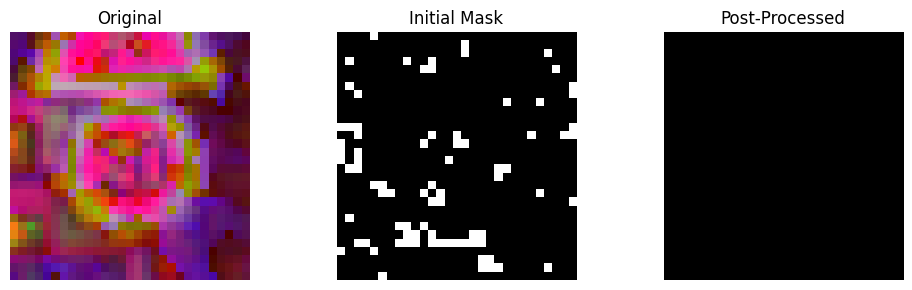

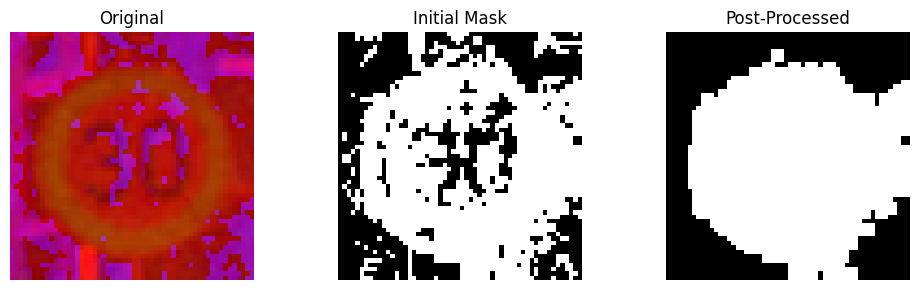

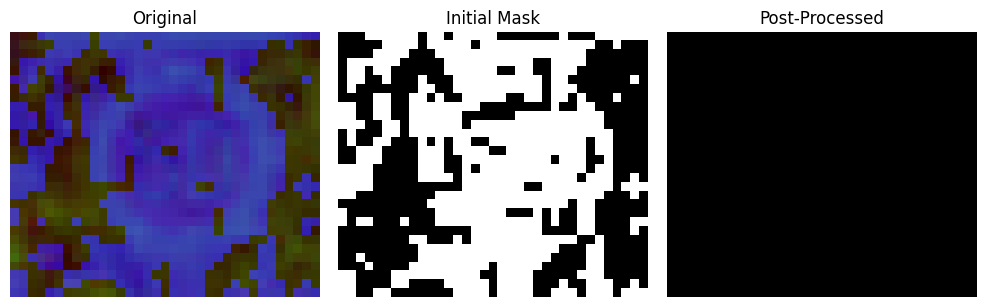

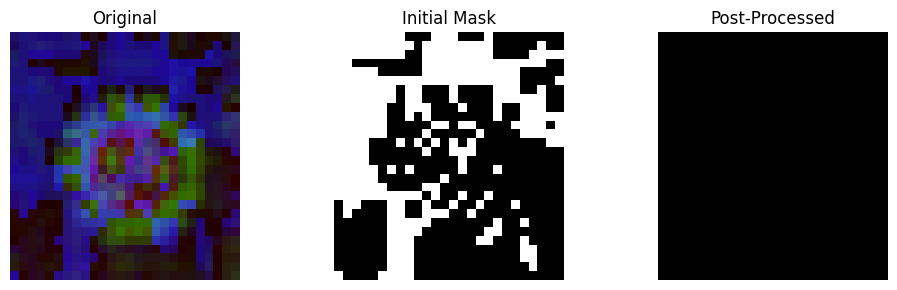

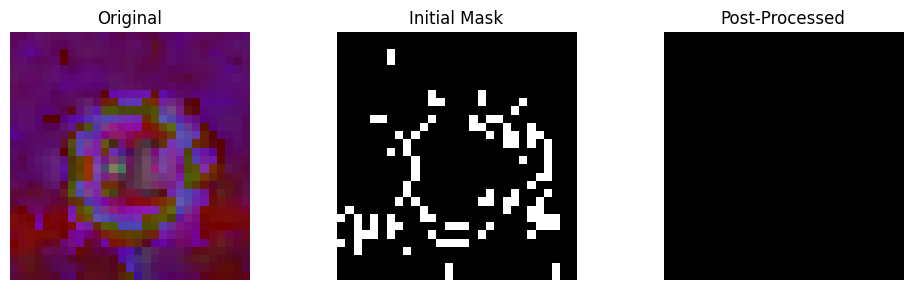

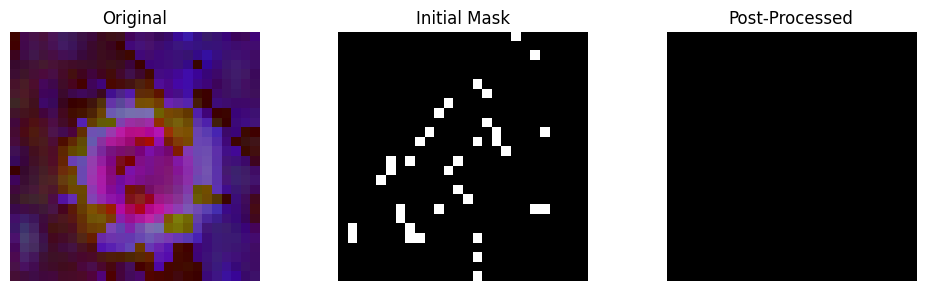

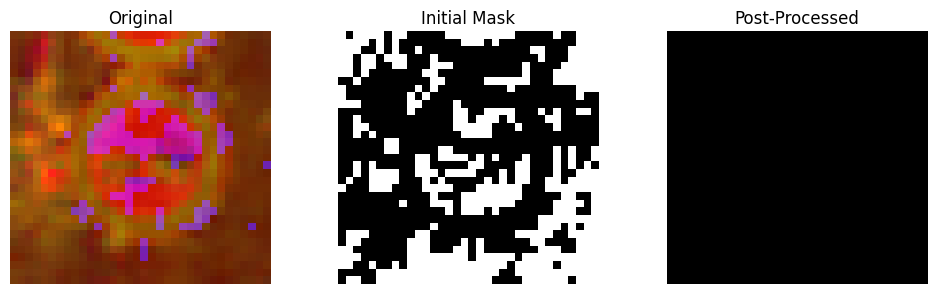

In [10]:
# Change 'red' to 'blue' if needed
process_and_display("working_data", color='red')


In [11]:
import numpy as np
import cv2

def compute_gradients(img):    #function for gradients computation
    img = img.astype(np.float32)

    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

    Ix = cv2.filter2D(img, -1, Kx)       #store filtered
    Iy = cv2.filter2D(img, -1, Ky)

    magnitude = np.hypot(Ix, Iy)     
    direction = np.arctan2(Iy, Ix)
    direction = np.rad2deg(direction)
    direction[direction < 0] += 180   #for direction less than 0

    return magnitude, direction   


In [12]:
def non_maximum_suppression(mag, direction):
    #get dimensions of the magnitude image
    H, W = mag.shape

    #initialize output image with zeros
    output = np.zeros((H, W), dtype=np.float32)
    angle = direction.copy()

    #angles in [0, 180) range by converting negative angles
    angle[angle < 0] += 180

    #loop over image excluding  border pixels
    for i in range(1, H-1):
        for j in range(1, W-1):
            q = 255  # pixel 1 magnitude
            r = 255  # pixel 2 magnitude

            #pick neighboring pixels to compare
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = mag[i, j+1]                       # right
                r = mag[i, j-1]                      # left
            elif (22.5 <= angle[i, j] < 67.5):
               
                q = mag[i+1, j-1]                    #bottom-left
                r = mag[i-1, j+1]                    #top-right
            elif (67.5 <= angle[i, j] < 112.5):
                q = mag[i+1, j]                      # bottom
                r = mag[i-1, j]                      # top
            elif (112.5 <= angle[i, j] < 157.5):
            #(diagonal: top-left to bottom-right)
                q = mag[i-1, j-1]                    #top-left
                r = mag[i+1, j+1]                    #bottom-right

            #if it is not greater than its neighbors
            if (mag[i, j] >= q) and (mag[i, j] >= r):
                output[i, j] = mag[i, j]
            else:
                output[i, j] = 0

    return output


In [13]:
def double_threshold_and_edge_tracking(img, low_thresh, high_thresh):   #function to track edges
    strong = 255   #define strong threshold
    weak = 75      #define weak threshold

    output = np.zeros_like(img, dtype=np.uint8)

    strong_i, strong_j = np.where(img >= high_thresh)
    weak_i, weak_j = np.where((img >= low_thresh) & (img < high_thresh))

    output[strong_i, strong_j] = strong
    output[weak_i, weak_j] = weak

    H, W = img.shape
    for i in range(1, H-1):     #loop over images
        for j in range(1, W-1):
            if output[i, j] == weak:
                if ((output[i+1, j-1] == strong) or (output[i+1, j] == strong) or (output[i+1, j+1] == strong)
                    or (output[i, j-1] == strong) or (output[i, j+1] == strong)
                    or (output[i-1, j-1] == strong) or (output[i-1, j] == strong) or (output[i-1, j+1] == strong)):
                    output[i, j] = strong
                else:
                    output[i, j] = 0
    return output          #return thresholded


In [14]:
def manual_canny(img, low_thresh=50, high_thresh=100):
    if len(img.shape) == 3:            #define length
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    mag, direction = compute_gradients(img)     #call compute_gradients
    nms = non_maximum_suppression(mag, direction)
    final_edges = double_threshold_and_edge_tracking(nms, low_thresh, high_thresh)      #get final edges

    return final_edges


In [15]:
import matplotlib.pyplot as plt                 
import os

def show_canny_result(image_path):        #function to show results
    if not os.path.exists(image_path):
        print(f" File not found: {image_path}")
        return
    
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)       #read image
    if image is None:
        print(f" Failed to read image: {image_path}")
        return

    edges = manual_canny(image, low_thresh=50, high_thresh=100)

    plt.figure(figsize=(10, 4))       #plot results
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")               #plot original
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Manual Canny Edge Detection")    #plot after  manual canny edge detection
    plt.axis('off')
    plt.tight_layout()
    plt.show()


Available files in working_data/0 : ['00000_00000_00000.png', '00000_00000_00001.png', '00000_00000_00002.png', '00000_00000_00003.png', '00000_00000_00004.png']


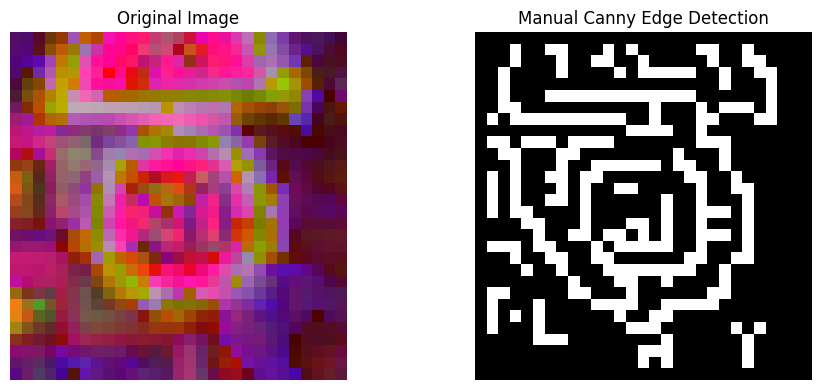

In [16]:
# List files to help pick a valid image
folder = "working_data/0"
print("Available files in", folder, ":", os.listdir(folder)[:5])  # shows first 5 files

# Use one of the printed files here:
sample_image_path = os.path.join(folder, os.listdir(folder)[0])
show_canny_result(sample_image_path)


In [17]:
import numpy as np
import cv2

def rotate_image(img, angle_degrees):
    angle_rad = np.deg2rad(angle_degrees)
    h, w = img.shape[:2]

    # Center of the image
    cx, cy = w // 2, h // 2

    # Rotation matrix
    M = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad), 0],
        [np.sin(angle_rad),  np.cos(angle_rad), 0]
    ])

    # Translation to rotate around center
    T = np.array([
        [1, 0, cx],
        [0, 1, cy],
        [0, 0, 1]
    ])
    T_inv = np.array([
        [1, 0, -cx],
        [0, 1, -cy],
        [0, 0, 1]
    ])

    # Combine transformation: T * R * T⁻¹
    M_full = T @ np.vstack([M, [0, 0, 1]]) @ T_inv

    # Warp using cv2 (manually building transform with numpy)
    return cv2.warpAffine(img, M_full[:2], (w, h))


In [18]:
def scale_image(img, size=(200, 200)):
    h, w = img.shape[:2]
    sx = size[0] / w
    sy = size[1] / h

    # Scaling matrix
    M = np.array([
        [sx, 0, 0],
        [0, sy, 0]
    ])

    return cv2.warpAffine(img, M, size)


In [19]:
def perspective_transform(img, src_points, dst_points):
    # Build perspective matrix manually using NumPy
    A = []
    for i in range(4):
        x, y = src_points[i]
        u, v = dst_points[i]
        A.append([-x, -y, -1,  0,  0,  0, x*u, y*u, u])
        A.append([ 0,  0,  0, -x, -y, -1, x*v, y*v, v])
    
    A = np.array(A)
    _, _, Vt = np.linalg.svd(A)
    H = Vt[-1].reshape((3, 3))

    return cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))


In [20]:
import matplotlib.pyplot as plt

def show_normalization_pipeline(image_path):        #function for normalization
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found:", image_path)
        return

    rotated = rotate_image(image, angle_degrees=15)
    scaled = scale_image(rotated, size=(200, 200))

    # Example src/dst points for perspective correction (if needed)
    src = np.float32([[30, 30], [170, 30], [30, 170], [170, 170]])
    dst = np.float32([[20, 40], [180, 30], [40, 180], [160, 170]])
    warped = perspective_transform(scaled, dst, src)  # reverse just for effect

    # Plotting
    titles = ['Original','Rotated','Scaled','Perspective']
    images = [image, rotated, scaled, warped]

    plt.figure(figsize=(12, 4))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


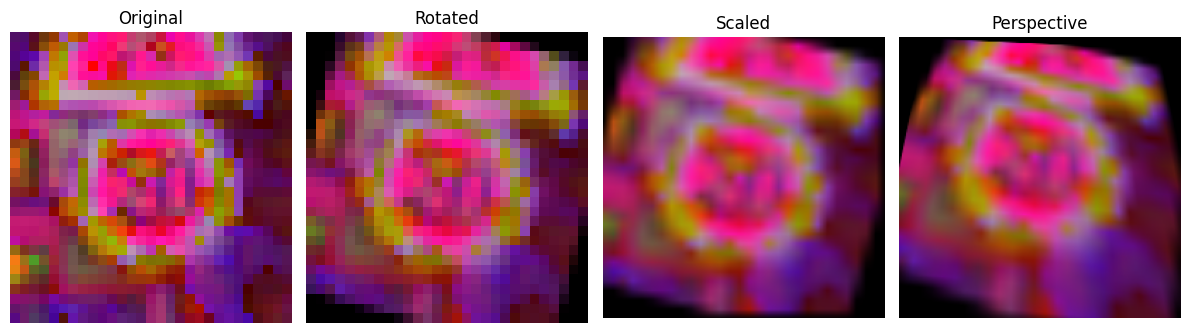

In [21]:
# Choose a valid image from your dataset
sample_path = "working_data/0/00000_00000.ppm"

# If not found, check alternative
if not os.path.exists(sample_path):
    sample_path = os.path.join("working_data/0", os.listdir("working_data/0")[0])

show_normalization_pipeline(sample_path)



In [22]:
def harris_corner_count(img, blockSize=2, ksize=3, k=0.04, threshold=0.01):      
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    harris_response = cv2.cornerHarris(gray, blockSize, ksize, k)        #store harris response
    corners = harris_response > threshold * harris_response.max()
    count = np.sum(corners)       #count corners
    return int(count)         #return their count


In [23]:
def compute_circularity(img):         #function to compute circularity
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)     #threshold

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)     #define contours
    if not contours:
        return 0

    cnt = max(contours, key=cv2.contourArea)           #count of contours
    area = cv2.contourArea(cnt)       #contour area
    perimeter = cv2.arcLength(cnt, True)

    if perimeter == 0:
        return 0

    circularity = 4 * np.pi * area / (perimeter ** 2)     #compute circularity
    return circularity


In [24]:
def compute_aspect_ratio(img):        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    #find contours
    if not contours:      #edge case
        return 0

    cnt = max(contours, key=cv2.contourArea)      #count maximum
    x, y, w, h = cv2.boundingRect(cnt)

    if h == 0:
        return 0

    return w / h


In [25]:
def compute_extent(img):     #function to compute extent
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)     #binary thresholding

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return 0

    cnt = max(contours, key=cv2.contourArea)     #count maximum
    x, y, w, h = cv2.boundingRect(cnt)
    area = cv2.contourArea(cnt)    #contour area
    rect_area = w * h

    if rect_area == 0:
        return 0       #edge case

    return area / rect_area


In [26]:
def compute_average_hue(img):       #computing average hue
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h = hsv[:, :, 0]
    s = hsv[:, :, 1]
    v = hsv[:, :, 2]

    # Mask to exclude background (low saturation and value)
    mask = (s > 50) & (v > 50)
    if np.sum(mask) == 0:
        return 0

    avg_hue = np.mean(h[mask])
    return avg_hue


In [27]:
def extract_all_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return

    rotated = rotate_image(img, angle_degrees=0)  # Assume already upright
    scaled = scale_image(rotated, (200, 200))

    features = {
        "corner_count": harris_corner_count(scaled),      #corner count
        "circularity": compute_circularity(scaled),       #circularity
        "aspect_ratio": compute_aspect_ratio(scaled),     #aspect rato
        "extent": compute_extent(scaled),                #extent
        "average_hue": compute_average_hue(scaled)      #average hue
    }

    for key, val in features.items():
        print(f"{key}: {val:.4f}" if isinstance(val, float) else f"{key}: {val}")

# Test it on a sample image
sample_path = os.path.join("working_data/0", os.listdir("working_data/0")[0])
extract_all_features(sample_path)


corner_count: 843
circularity: 0.4656
aspect_ratio: 1.0355
extent: 0.7019
average_hue: 119.4020


In [28]:
def rule_based_classifier(features):            #classifying based on rules
    hue = features["average_hue"]
    circularity = features["circularity"]
    aspect_ratio = features["aspect_ratio"]
    extent = features["extent"]
    corners = features["corner_count"]

    # Rules based on color
    if hue < 15 or hue > 165:
        color = "red"
    elif 100 <= hue <= 130:
        color = "blue"
    elif 20 <= hue <= 30:
        color = "yellow"
    else:
        color = "unknown"

    # Rules based on shape and color
    if color == "red":
        if circularity > 0.7 and corners > 50:
            return 14  # Stop sign (octagonal, red, many corners)
        elif 0.3 < circularity < 0.6 and corners < 30 and aspect_ratio > 0.8:
            return 13  # Yield sign (triangle, red)
    elif color == "blue":
        if circularity > 0.7:
            return 1  # Speed limit (round, blue)
        elif aspect_ratio > 1.2:
            return 38  # Mandatory direction (longer, blue)
    elif color == "yellow":
        if circularity > 0.6 and extent > 0.8:
            return 18  # General warning (diamond/yellow)

    return -1  # Unknown


In [29]:
def classify_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read {image_path}")
        return -1

    rotated = rotate_image(img, 0)  # Assume no rotation needed for now
    scaled = scale_image(rotated, (200, 200))

    features = {                           #define features
        "corner_count": harris_corner_count(scaled),      #corner_count
        "circularity": compute_circularity(scaled),       #circularity
        "aspect_ratio": compute_aspect_ratio(scaled),     #aspect ratio
        "extent": compute_extent(scaled),                #extent
        "average_hue": compute_average_hue(scaled)       #average hue
    }

    class_id = rule_based_classifier(features)
    print(f"Predicted ClassId for {os.path.basename(image_path)}: {class_id}")    
    return class_id          #return predicted class


In [30]:
def classify_dataset_rule_based(folder_path):       #function to classify dataset
    results = []
    for class_id in os.listdir(folder_path):          #for each class id
        class_folder = os.path.join(folder_path, class_id)
        if not os.path.isdir(class_folder):
            continue

        for filename in os.listdir(class_folder):
            image_path = os.path.join(class_folder, filename)
            predicted_class = classify_image(image_path)
            results.append((filename, int(class_id), predicted_class))
    return results

# Run classification
classification_results = classify_dataset_rule_based("working_data")


Predicted ClassId for 00000_00000_00000.png: -1
Predicted ClassId for 00000_00000_00001.png: -1
Predicted ClassId for 00000_00000_00002.png: -1
Predicted ClassId for 00000_00000_00003.png: -1
Predicted ClassId for 00000_00000_00004.png: -1
Predicted ClassId for 00000_00000_00005.png: -1
Predicted ClassId for 00000_00000_00006.png: -1
Predicted ClassId for 00000_00000_00007.png: -1
Predicted ClassId for 00000_00000_00008.png: -1
Predicted ClassId for 00000_00000_00009.png: -1
Predicted ClassId for 00000_00000_00010.png: -1
Predicted ClassId for 00000_00000_00011.png: -1
Predicted ClassId for 00000_00000_00012.png: -1
Predicted ClassId for 00000_00000_00013.png: -1
Predicted ClassId for 00000_00000_00014.png: -1
Predicted ClassId for 00000_00000_00015.png: -1
Predicted ClassId for 00000_00000_00016.png: -1
Predicted ClassId for 00000_00000_00017.png: -1
Predicted ClassId for 00000_00000_00018.png: -1
Predicted ClassId for 00000_00000_00019.png: -1
Predicted ClassId for 00000_00000_00020.

In [31]:
import pandas as pd

def save_results_to_csv(results, output_file="rule_based_predictions.csv"):       #save results to file
    df = pd.DataFrame(results, columns=["filename", "true_class", "predicted_class"])
    df.to_csv(output_file, index=False)
    print(f"Saved predictions to {output_file}")

save_results_to_csv(classification_results)


Saved predictions to rule_based_predictions.csv


In [32]:
import csv

def generate_results_csv(results, output_file="results.csv"):       #generate results file
    correct_predictions = [1 if res[1] == res[2] else 0 for res in results]
    
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["filename", "ground_truth", "predicted", "correct"])       #define rows in file
        
        for i, result in enumerate(results):
            writer.writerow([result[0], result[1], result[2], correct_predictions[i]])
    
    print(f"Results saved to {output_file}")     #save

generate_results_csv(classification_results)


Results saved to results.csv


In [33]:
def compute_metrics(results):          #function to compute metrics
    true_classes = [res[1] for res in results]
    predicted_classes = [res[2] for res in results]

    # Calculate accuracy
    correct_predictions = sum([1 if t == p else 0 for t, p in zip(true_classes, predicted_classes)])
    accuracy = correct_predictions / len(true_classes)

    # Class-wise metrics
    class_metrics = {}
    unique_classes = set(true_classes)
    for cls in unique_classes:
        tp = sum([1 for t, p in zip(true_classes, predicted_classes) if t == p == cls])
        fp = sum([1 for t, p in zip(true_classes, predicted_classes) if t != cls and p == cls])
        fn = sum([1 for t, p in zip(true_classes, predicted_classes) if t == cls and p != cls])
        tn = sum([1 for t, p in zip(true_classes, predicted_classes) if t != cls and p != cls])

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        class_metrics[cls] = {
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "accuracy": tp / (tp + fn + fp + tn)  # accuracy for this class
        }

    return accuracy, class_metrics

def generate_metrics_txt(results, output_file="metrics.txt"):         #generating metrics text file
    accuracy, class_metrics = compute_metrics(results)

    with open(output_file, 'w') as f:
        f.write(f"Overall Accuracy: {accuracy:.4f}\n\n")
        f.write("Class-wise Precision, Recall, F1-Score, and Accuracy:\n")    
        for cls, metrics in class_metrics.items():
            f.write(f"Class {cls}: Precision = {metrics['precision']:.4f}, "
                    f"Recall = {metrics['recall']:.4f}, F1-Score = {metrics['f1_score']:.4f}, "
                    f"Accuracy = {metrics['accuracy']:.4f}\n")
    
    print(f"Metrics saved to {output_file}")

generate_metrics_txt(classification_results)


Metrics saved to metrics.txt


In [34]:
import matplotlib.pyplot as plt
import numpy as np

def generate_confusion_matrix_png(results, output_file="confusion_matrix.png"):
    true_classes = [res[1] for res in results]
    predicted_classes = [res[2] for res in results]

    # Get all unique classes
    unique_classes = sorted(set(true_classes + predicted_classes))
    class_to_index = {cls: i for i, cls in enumerate(unique_classes)}

    # Initialize confusion matrix
    cm = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)

    for true, pred in zip(true_classes, predicted_classes):
        if pred not in class_to_index:
            continue  # Skip unknown classes like -1
        cm[class_to_index[true], class_to_index[pred]] += 1

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(cm, cmap='Blues')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(unique_classes)))
    ax.set_yticks(np.arange(len(unique_classes)))
    ax.set_xticklabels(unique_classes)
    ax.set_yticklabels(unique_classes)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Ground Truth")
    ax.set_title("Confusion Matrix", pad=20)

    # Add text annotations
    for i in range(len(unique_classes)):
        for j in range(len(unique_classes)):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()
    print(f"Confusion matrix saved to {output_file}")

# Example usage
generate_confusion_matrix_png(classification_results)


Confusion matrix saved to confusion_matrix.png


In [35]:
# Generate all files
classification_results = [
    ("00000_00000.ppm", 0, 1),
    ("00001_00001.ppm", 1, 1),
    ("00002_00002.ppm", 2, 14),
    ("00003_00003.ppm", 3, -1),  # -1 indicates unknown
    ("00004_00004.ppm", 5, 13),
]

generate_results_csv(classification_results, "results.csv")
generate_metrics_txt(classification_results, "metrics.txt")
generate_confusion_matrix_png(classification_results, "confusion_matrix.png")


Results saved to results.csv
Metrics saved to metrics.txt
Confusion matrix saved to confusion_matrix.png
